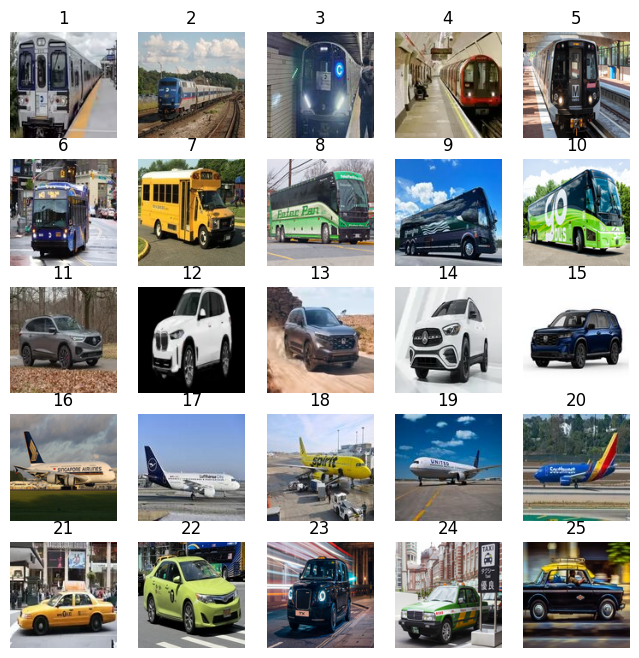

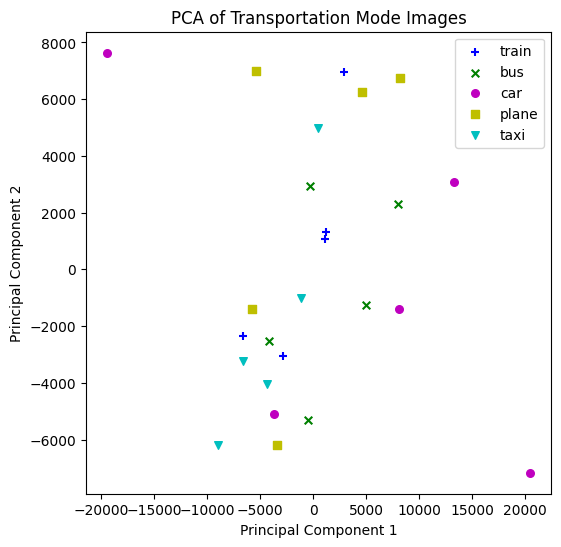

In [2]:
"""
Code to demonstrate Data preprocessing using Principal Component Analysis (PCA)

This program loads 25 images of different modes of transportation, that are
grouped into 5 different categories. The images are converted to feature values.
The first two principal components are projected and the projected values are
used to draw a scatter plot.

Author: Rohan Kulkarni
Date: September 18, 2024
Version: 1.0.0
"""

# Read each image file and convert the RGB image into a 125 x 125 x 3 = 46875 feature values.

# import all the required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# no of images
imageCount = 25

# create a new figure with size 8,8
figure = plt.figure(figsize=(8,8))

# create a numpy array of shape (25,46875)
imgData = np.zeros(shape=(imageCount,46875))

# loop through to convert each images to feature values
# Create a data matrix of size 25 x 46875.
for count in range(1,imageCount+1):
    filename = f'Image{count}.jpeg' # Using an f-string for easier formatting
    # read image from file into an array
    img = mpimg.imread(filename)
    ax = figure.add_subplot(5,5,count)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(count))
    imgData[count-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

# Data matrix is projected to its first two principal components using PCA.
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

#The projected values of the original image data are stored in a pandas DataFrame object named projected.
projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,imageCount+1))
projected['transportation'] = ['train', 'train','train','train','train','bus','bus','bus',
                      'bus', 'bus', 'car', 'car', 'car', 'car', 'car', 'plane','plane','plane',
                      'plane', 'plane', 'taxi', 'taxi', 'taxi', 'taxi', 'taxi']
projected


# Draw a scatter plot with the projected values
import matplotlib.pyplot as plt

# Create a new figure for the scatter plot
plt.figure(figsize=(6, 6))

colors = {'train':'b', 'bus':'g', 'car':'m', 'plane':'y', 'taxi':'c'}
markerTypes = {'train':'+', 'bus':'x', 'car':'o', 'plane':'s', 'taxi':'v'}

for transportationType in markerTypes:
    d = projected[projected['transportation']==transportationType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[transportationType],s=30,marker=markerTypes[transportationType])

# Add title and labels to the scatter plot
plt.title('PCA of Transportation Mode Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(colors)
plt.show()

# New Section